# Survival of Titanic 
I have collected the dataset from Kaggle  (https://www.kaggle.com/c/titanic) this and  I will be using Machine Learning to predict the survival status of passengers on the Titanic

In [73]:
import pandas as pd

In [74]:
tit=pd.read_csv(r"C:\Users\admin\Desktop\datasets\Titanic.csv")

In [75]:
tit1=tit.drop(["name","cabin","body","home.dest","boat","ticket"],axis=1)
tit1.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S


In [76]:
tit1.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64

In [77]:
tit1.age=tit1.age.fillna(tit1.age.mean())
tit1.embarked=tit1.embarked.fillna("s")
tit1.fare=tit1.fare.fillna(tit1.fare.mean())
tit1.shape
tit1.isnull().sum() 
tit1.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S


In [78]:
tit2=tit1.dropna()
tit2.isnull().sum() 

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [79]:
correlation=tit2.corr()
correlation

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244208
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


# Exploratory Data Analysis

In [80]:
import  matplotlib.pyplot as plt

Text(0, 0.5, 'survived count')

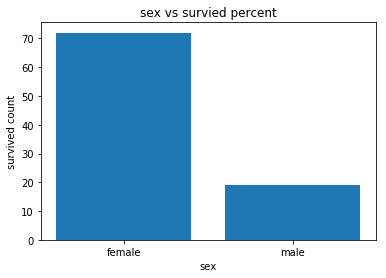

In [81]:
ab=tit2.groupby('sex').survived.value_counts()
ab
survived=(72,19)
sex=('female','male')
plt.bar(sex,survived)
plt.title("sex vs survied percent")
plt.xlabel("sex")
plt.ylabel("survived count")



In [82]:
import seaborn as sns

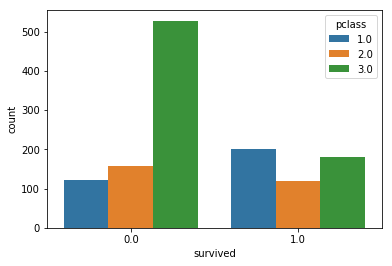

In [83]:
sns.countplot(x='survived',hue='pclass',data=tit2)

In [84]:
tit2.head(2)
tit2.sex.replace({"male":1,"female":0},inplace=True)
tit2.embarked.replace({"S":1,"C":2,"Q":3,"s":4},inplace=True)


D:\anaconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [85]:
tit2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,1


In [86]:
import sklearn
from  sklearn.model_selection import train_test_split

In [87]:
tit2_x=tit2.drop(["survived"],axis=1)
tit2_y=tit2.survived

In [88]:
tit2_x_train,tit2_x_test,tit2_y_train,tit2_y_test=train_test_split(tit2_x,tit2_y,test_size=0.2,random_state=101)

# LogisticRegression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [90]:
titmodel=LogisticRegression()

In [91]:
titmodel.fit(tit2_x_train,tit2_y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
tit2_x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
1218,3.0,1,30.000000,0.0,0.0,8.0500,1
1060,3.0,0,18.000000,0.0,0.0,7.7750,1
24,1.0,0,29.000000,0.0,0.0,221.7792,1
840,3.0,0,24.000000,0.0,0.0,8.8500,1
816,3.0,1,29.881135,0.0,0.0,7.8958,2


In [93]:
pred=titmodel.predict(tit2_x_test)
pred

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [94]:
tab1=confusion_matrix(pred,tit2_y_test)
tab1


array([[133,  28],
       [ 22,  79]], dtype=int64)

In [95]:
tab1.diagonal().sum()/tab1.sum()*100

80.91603053435115

In [96]:
pred_prob=titmodel.predict_proba(tit2_x_test)
pred_prob

array([[0.85057026, 0.14942974],
       [0.51132577, 0.48867423],
       [0.30588055, 0.69411945],
       [0.67170196, 0.32829804],
       [0.22578482, 0.77421518],
       [0.72349295, 0.27650705],
       [0.28838106, 0.71161894],
       [0.38340538, 0.61659462],
       [0.14582507, 0.85417493],
       [0.91716819, 0.08283181],
       [0.90934596, 0.09065404],
       [0.69305021, 0.30694979],
       [0.93336976, 0.06663024],
       [0.63085529, 0.36914471],
       [0.27557392, 0.72442608],
       [0.89612169, 0.10387831],
       [0.39751105, 0.60248895],
       [0.07508369, 0.92491631],
       [0.4704824 , 0.5295176 ],
       [0.41085824, 0.58914176],
       [0.40649276, 0.59350724],
       [0.088387  , 0.911613  ],
       [0.90258706, 0.09741294],
       [0.8687831 , 0.1312169 ],
       [0.26909634, 0.73090366],
       [0.85057119, 0.14942881],
       [0.90940849, 0.09059151],
       [0.33648415, 0.66351585],
       [0.88119911, 0.11880089],
       [0.30788816, 0.69211184],
       [0.

# DecisionTreeClassifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtree_tit=DecisionTreeClassifier()
dtree_tit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
dtree_tit.fit(tit2_x_train ,tit2_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
pred_tit=dtree_tit.predict(tit2_x_test)
pred_tit

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [101]:
tab=confusion_matrix(pred_tit,tit2_y_test)
tab
tab.diagonal().sum()/tab.sum()*100

75.95419847328245

In [102]:
feature_score=pd.DataFrame({"Importance":dtree_tit.feature_importances_,"Variable_Name":tit2_x_train.columns})
feature_score
feature_score.sort_values(["Importance"],ascending=False)

,Importance,Variable_Name
1,0.278509,sex
2,0.264146,age
5,0.249712,fare
0,0.110933,pclass
3,0.044353,sibsp
6,0.033340,embarked
4,0.019007,parch


# AdaBoostClassifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
tit_boost=AdaBoostClassifier(RandomForestClassifier(),n_estimators=20)

In [106]:
tit_boost.fit(tit2_x_train,tit2_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [107]:
pred_boost=tit_boost.predict(tit2_x_test)
pred_boost

array([0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [108]:
tab_boost=confusion_matrix(pred_boost,tit2_y_test)
tab_boost


array([[128,  29],
       [ 27,  78]], dtype=int64)

In [109]:
tab_boost.diagonal().sum()/tab_boost.sum()*100

78.62595419847328